In [1]:
!pwd

/home/bms/Documents/phd-study/2025-fall/cs-204-networks/project/cs204-quic/aioquic/analytics


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analyze import QLogAnalyzer

# Happy case: No network constraints

In [2]:
qla = QLogAnalyzer("../pkt_logs/client_20251112-230204_log.json")

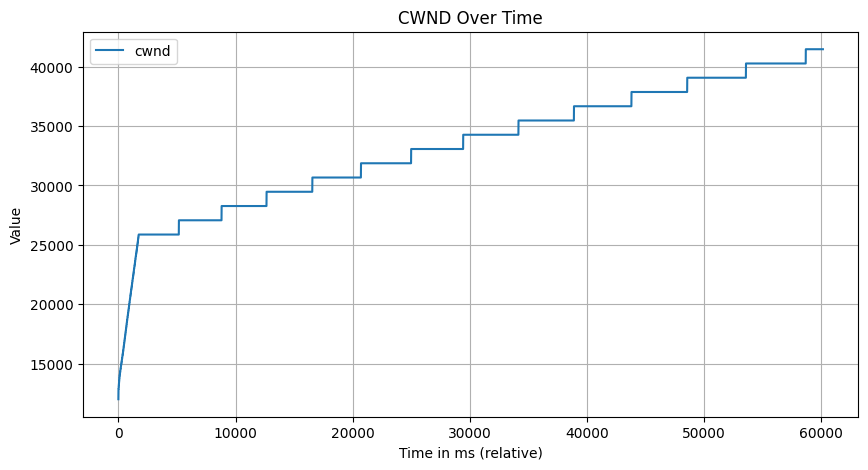

In [13]:
df = pd.DataFrame(qla.analyze_cwnd())

# Convert large timestamps to relative (recommended)
t0 = df["time"].iloc[0]
df["time_rel"] = df["time"] - t0

# Plot
plt.figure(figsize=(10, 5))

plt.plot(df["time_rel"], df["cwnd"], label="cwnd")
# plt.plot(df["time_rel"], df["bytes_in_flight"], marker="o", label="bytes_in_flight")

plt.xlabel("Time in ms (relative)")
plt.ylabel("Value")
plt.title("CWND Over Time")
plt.legend()
plt.grid(True)

plt.show()

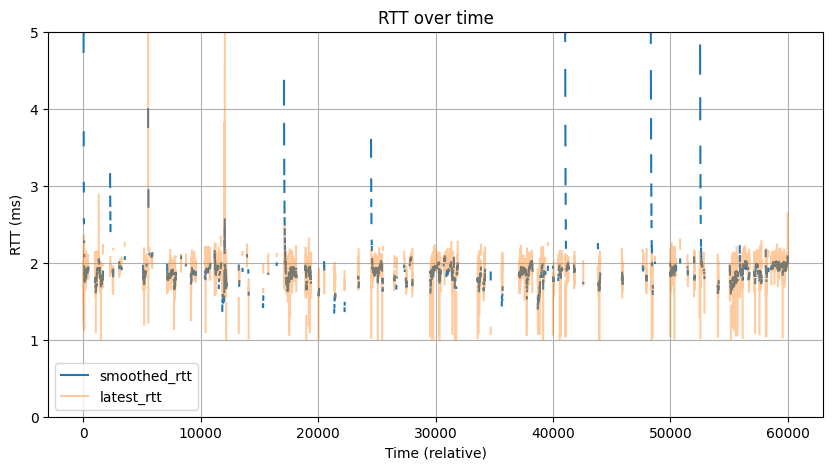

In [8]:
rtt_df = pd.DataFrame(qla.analyze_rtt())
t0 = rtt_df["time"].iloc[0]
rtt_df["time_rel"] = rtt_df["time"] - t0

plt.figure(figsize=(10, 5))
plt.plot(rtt_df["time_rel"], rtt_df["smoothed_rtt"], label="smoothed_rtt")
plt.plot(rtt_df["time_rel"], rtt_df["latest_rtt"], alpha=0.4, label="latest_rtt")
plt.xlabel("Time (relative)")
plt.ylabel("RTT (ms)")
plt.title("RTT over time")
plt.legend()
plt.grid(True)
plt.ylim(0, 5)
plt.show()


In [14]:
loss_df = pd.DataFrame(qla.analyze_loss())
if not loss_df.empty:
    t0 = loss_df["time"].iloc[0]
    loss_df["time_rel"] = loss_df["time"] - t0

    plt.figure(figsize=(10, 3))
    plt.scatter(loss_df["time_rel"], [1] * len(loss_df), marker="x")
    plt.yticks([])
    plt.xlabel("Time (relative)")
    plt.title("Loss events over time")
    plt.grid(True, axis="x")
    plt.show()

    print("Total lost packets:", len(loss_df))
else:
    print("No loss!")

No loss!


# E0: Random

In [2]:
qla = QLogAnalyzer("../pkt_logs/client_20251112-233803_log.json")

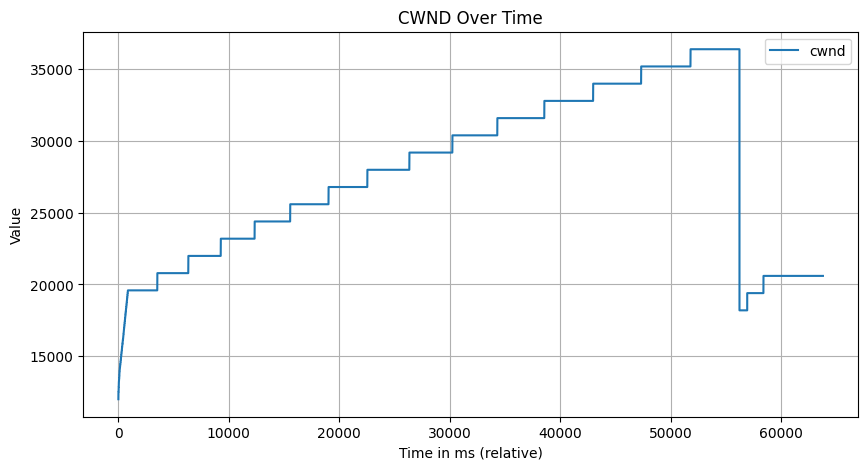

In [3]:
df = pd.DataFrame(qla.analyze_cwnd())

# Convert large timestamps to relative (recommended)
t0 = df["time"].iloc[0]
df["time_rel"] = df["time"] - t0

# Plot
plt.figure(figsize=(10, 5))

plt.plot(df["time_rel"], df["cwnd"], label="cwnd")
# plt.plot(df["time_rel"], df["bytes_in_flight"], marker="o", label="bytes_in_flight")

plt.xlabel("Time in ms (relative)")
plt.ylabel("Value")
plt.title("CWND Over Time")
plt.legend()
plt.grid(True)

plt.show()